# Section 4 segmentation


In this code, we will develope the segmentation model grouping the people from the demographic census dataset, which can help the marketing process. We will combine with K-means and Principle Component Analysis (PCA) and use Elbow method to get the appropriate K values

In [2]:
import pandas as pd

df = pd.read_csv("../data/preprocessed/cleaned_raw_encoded.csv")
df.head()

/var/folders/fy/rg_l8mrj7dl_ggqgdz22w7mc0000gn/T/ipykernel_3916/1569640692.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,73,3.0,0,0,12.0,0,2.0,6.0,14.0,6.0,...,39.0,39.0,39.0,4.0,0,1.0,2,0,95,0
1,58,6.0,4,34,16.0,0,2.0,0.0,4.0,8.0,...,39.0,39.0,39.0,4.0,0,1.0,2,52,94,0
2,18,3.0,0,0,0.0,0,1.0,4.0,14.0,6.0,...,41.0,41.0,41.0,0.0,0,1.0,2,0,95,0
3,9,3.0,0,0,10.0,0,2.0,4.0,14.0,6.0,...,39.0,39.0,39.0,4.0,0,1.0,0,0,94,0
4,10,3.0,0,0,10.0,0,2.0,4.0,14.0,6.0,...,39.0,39.0,39.0,4.0,0,1.0,0,0,94,0


In [3]:
df_cluster = df.drop(columns=["label", "weight"])
df_cluster.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year
0,73,3.0,0,0,12.0,0,2.0,6.0,14.0,6.0,...,4.0,39.0,39.0,39.0,4.0,0,1.0,2,0,95
1,58,6.0,4,34,16.0,0,2.0,0.0,4.0,8.0,...,4.0,39.0,39.0,39.0,4.0,0,1.0,2,52,94
2,18,3.0,0,0,0.0,0,1.0,4.0,14.0,6.0,...,4.0,41.0,41.0,41.0,0.0,0,1.0,2,0,95
3,9,3.0,0,0,10.0,0,2.0,4.0,14.0,6.0,...,0.0,39.0,39.0,39.0,4.0,0,1.0,0,0,94
4,10,3.0,0,0,10.0,0,2.0,4.0,14.0,6.0,...,0.0,39.0,39.0,39.0,4.0,0,1.0,0,0,94


In [4]:
categorical_cols = df_cluster.select_dtypes(include=["object"]).columns
numeric_cols = df_cluster.select_dtypes(exclude=["object"]).columns

print("Categorical:", len(categorical_cols))
print("Numeric:", len(numeric_cols))

Categorical: 0
Numeric: 40


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

#### Here we will use the PCA method and utilize the cumulative Explained variance to get how many components of the reduced dimension is suitable.

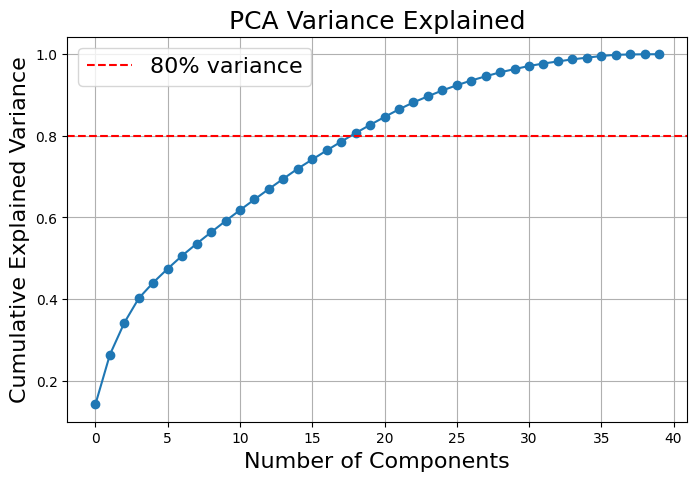

In [13]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()               # do not asign the dimension by hand, do it by pca Elbow plot
pca.fit(X_scaled)

explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(8,5))
plt.plot(cumulative, marker='o')
plt.axhline(0.80, color='red', linestyle='--', label='80% variance')
# plt.axhline(0.95, color='green', linestyle='--', label='95% variance')
plt.xlabel("Number of Components", size=16)
plt.ylabel("Cumulative Explained Variance", size=16)
plt.title("PCA Variance Explained", size=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()



In [ ]:
from sklearn.decomposition import PCA

# Create PCA with 10 components
pca = PCA(n_components=20, random_state=42)

# Fit PCA on scaled data & transform 
X_scaled_dim_reduced = pca.fit_transform(X_scaled)

X_scaled_dim_reduced.shape


(199523, 20)

#### In this part, we will conduct the K-means method with elbow plot to identify the value of K

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K_range = range(2, 21)   # 

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled_dim_reduced)
    inertia.append(km.inertia_)


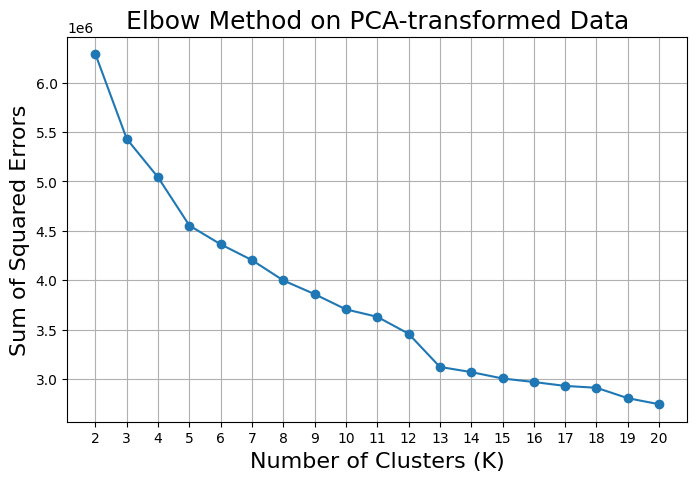

In [14]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xticks(K_range)
plt.xlabel("Number of Clusters (K)", size=16)
plt.ylabel("Sum of Squared Errors" , size=16)
plt.title("Elbow Method on PCA-transformed Data", size=18)
plt.grid(True)
plt.show()

In [20]:
### select cluster=13 for k-means
kmeans = KMeans(n_clusters=13, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df["cluster"] = clusters

#### Here, we calculated the weighted high income rate for each cluster

In [ ]:
import pandas as pd

# Load dataset with cluster assignments
df = pd.read_csv("../data/preprocessed/cleaned_raw_encoded_with_cluster.csv")

# ---- Weighted statistics ----
cluster_stats = df.groupby("cluster").agg(
    weighted_total=("weight", "sum"),                     # calculate weighted population 
    weighted_high_income=("label", lambda x: (x * df.loc[x.index, "weight"]).sum()),  
)

# Weighted high-income rate
cluster_stats["weighted_high_income_rate"] = (
    cluster_stats["weighted_high_income"] / cluster_stats["weighted_total"]
)

# Weighted cluster share (the percentage of the each cluster account for total population)
total_weight = df["weight"].sum()
cluster_stats["cluster_population_share"] = cluster_stats["weighted_total"] / total_weight

cluster_stats


,weighted_total,weighted_high_income,weighted_high_income_rate,cluster_population_share
cluster,,,,
0,10352840.52,370437.92,0.035781,0.029814
1,42926113.66,0.00,0.000000,0.123619
2,10347765.26,365951.03,0.035365,0.029800
3,73944556.38,9383194.09,0.126895,0.212946
4,60822606.01,7551465.39,0.124156,0.175157
5,17327990.08,36022.33,0.002079,0.049901
6,39326117.09,2666.07,0.000068,0.113251
7,9148165.89,474626.70,0.051882,0.026345
8,6523599.13,2032853.64,0.311615,0.018787


['weight']
Cluster size: 7614


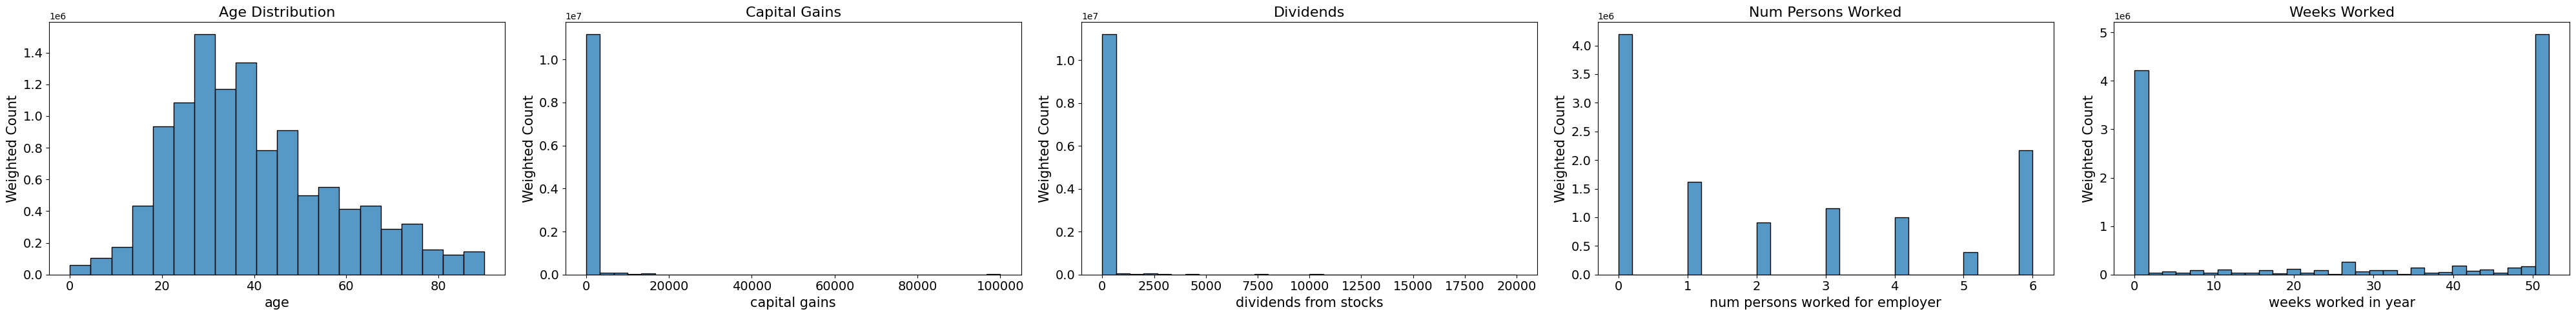

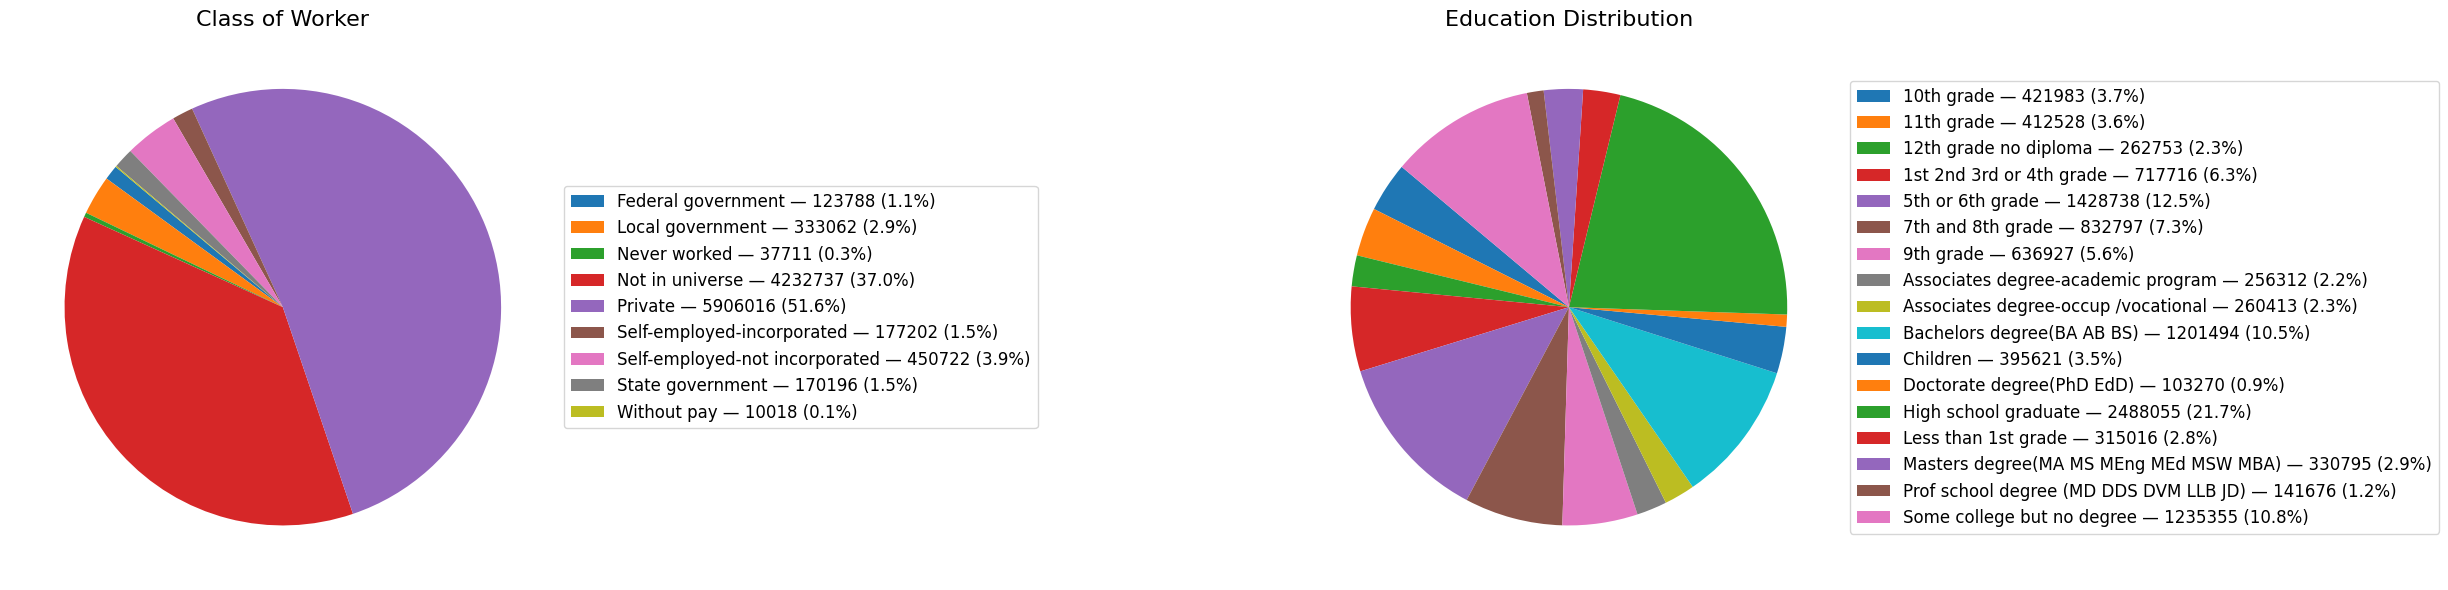

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Helper functions 

def hist_ax(ax, data, col, title, set_bins=30, weight_col="weight"):
    sns.histplot(
        data=data,
        x=col,
        bins=set_bins,
        weights=data[weight_col],
        kde=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(col, fontsize=15)
    ax.set_ylabel("Weighted Count", fontsize=15)
    ax.tick_params(axis='both', labelsize=14)


def pie_ax(ax, df, col, title, weight_col="weight"):
    weighted_counts = df.groupby(col)[weight_col].sum()

    labels = weighted_counts.index
    values = weighted_counts.values
    proportions = values / values.sum() * 100

    wedges, _ = ax.pie(values, startangle=140)

    ax.legend(
        wedges,
        [f"{lbl} — {int(val)} ({prop:.1f}%)"
         for lbl, val, prop in zip(labels, values, proportions)],
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=12,
    )
    ax.set_title(title, fontsize=16)


# Use asign the cluster ID and will plot the important feature distribution
cluster_id = 0


df_encoded = pd.read_csv("../data/preprocessed/cleaned_raw_encoded_with_cluster.csv")
df_raw = pd.read_csv("../data/preprocessed/cleaned_raw.csv")

# Confirm the weight column
print([col for col in df_encoded.columns if "weight" in col.lower()])
# Assuming the weight column is named "weight". Adjust if different.



# get cluster rows based on df_encoded
cluster_idx = df_encoded[df_encoded["cluster"] == cluster_id].index

# numeric + weight data for histograms
cluster_data = df_encoded.loc[cluster_idx].copy()

# categorical real labels for pie charts
df_cluster_raw = df_raw.loc[cluster_idx].copy()

# IMPORTANT: add weight column to df_cluster_raw
df_cluster_raw["weight"] = df_encoded.loc[cluster_idx]["weight"].values

print("Cluster size:", len(cluster_data))


# Numeric feature histograms (weighted)
fig, axes = plt.subplots(1, 5, figsize=(40, 5))

hist_ax(axes[0], cluster_data, "age", "Age Distribution", 20)
hist_ax(axes[1], cluster_data, "capital gains", "Capital Gains", 30)
hist_ax(axes[2], cluster_data, "dividends from stocks", "Dividends")
hist_ax(axes[3], cluster_data, "num persons worked for employer", "Num Persons Worked")
hist_ax(axes[4], cluster_data, "weeks worked in year", "Weeks Worked")

plt.tight_layout()
plt.show()


# Categorical feature pie charts (weighted)
fig, axes = plt.subplots(1, 2, figsize=(30, 6))

pie_ax(axes[0], df_cluster_raw, "class of worker", "Class of Worker")
pie_ax(axes[1], df_cluster_raw, "education", "Education Distribution")

plt.tight_layout()
plt.show()
